In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def countCL(listefeature,df):
    v=1
    fig=plt.figure(figsize=(25,25))
    CL=["CL0","CL1","CL2","CL3","CL4","CL5","CL6"]
    listerepartition=pd.DataFrame(columns=CL)
    print(listerepartition)
    for i in listefeature:
        count=[0,0,0,0,0,0,0]
        for j in df[i]:
            count[j]+=1
        for j in range(len(count)):
            count[j]=count[j]/df.shape[0]
        listerepartition.loc[-1]=count
        listerepartition.index=listerepartition.index+1
        listerepartition=listerepartition.sort_index()
        fig.add_subplot(5,5,v)
        v+=1
        plt.bar(CL, count)
        plt.title("repartition de la consommation de "+ i)
    plt.show()
    listerepartition.insert(0,"Drugs",listefeature,True)
    return listerepartition

In [8]:
def countCLSexe(listefeature,df,df2):
    v=1
    fig=plt.figure(figsize=(30,30))
    CL=["CL0","CL1","CL2","CL3","CL4","CL5","CL6"]
    listerepartition=pd.DataFrame(columns=CL)
    for i in listefeature:
        countM=[0,0,0,0,0,0,0]
        countF=[0,0,0,0,0,0,0]
        countho=0
        countfe=0
        for j in range(1,len(df[i])):

            if df2["Gender"][j]=="M":
                countM[df[i][j]]+=1
                countho+=1
            if df2["Gender"][j]=="F":
                countF[df[i][j]]+=1
                countfe+=1

        for j in range(len(countM)):
            countM[j]=countM[j]/countho
            countF[j]=countF[j]/countfe
        
        fig.add_subplot(5,4,v)
        v+=1
        plt.bar(CL, countM)
        plt.title("repartition de la consommation de "+ i+" chez les hommes")
        fig.add_subplot(5,4,v)
        v+=1
        #plt.yticks((0,0.5))
        plt.bar(CL, countF)
        plt.title("repartition de la consommation de "+ i+ " chez les femme")
    plt.show()


In [21]:
def countCLSexeV2(listefeature,df,df2):
    v=1
    fig=plt.figure(figsize=(30,30))
    CL=["M","F"]
    listerepartition=pd.DataFrame(columns=CL)
    for i in listefeature:
        countM=0
        countF=0
        countho=0
        countfe=0
        for j in range(1,len(df[i])):

            if df2["Gender"][j]=="M":
                if df2[i][j]!="CL0":
                    countM+=1
                countho+=1
            if df2["Gender"][j]=="F":
                if df2[i][j]!="CL0":
                    countF+=1
                countfe+=1

      
        countM=countM/countho
        countF=countF/countfe
        
        fig.add_subplot(5,4,v)
        v+=1
        plt.bar(CL, countM)
        plt.title("repartition de la consommation de "+ i+" chez les hommes")
        fig.add_subplot(5,4,v)
        v+=1
        #plt.yticks((0,0.5))
        plt.bar(CL, countF)
        plt.title("repartition de la consommation de "+ i+ " chez les femme")
    plt.show()


In [10]:
def countCLage(listefeature,df,df2):
    v=1
    fig=plt.figure(figsize=(30,30))
    CL=["CL0","CL1","CL2","CL3","CL4","CL5","CL6"]
    listerepartition=pd.DataFrame(columns=CL)
    for i in listefeature:
        countM=[0,0,0,0,0,0,0]
        countF=[0,0,0,0,0,0,0]
        for j in range(1,len(df[i])):

            if df2["Gender"][j]=="M":
                countM[df[i][j]]+=1
            if df2["Gender"][j]=="F":
                countF[df[i][j]]+=1
        for j in range(len(countM)):
            countM[j]=countM[j]/df.shape[0]
            countF[j]=countF[j]/df.shape[0]
        
        fig.add_subplot(4,4,v)
        v+=1
        plt.bar(CL, countM)
        plt.title("repartition de la consommation de "+ i+" chez les hommes")
        fig.add_subplot(4,4,v)
        v+=1
        #plt.yticks((0,0.5))
        plt.bar(CL, countF)
        plt.title("repartition de la consommation de "+ i+ " chez les femme")
    plt.show()


In [11]:
dfdrug["Gender"][1]

NameError: name 'dfdrug' is not defined

In [12]:
dfdrug = pd.read_csv('archive/Drug_Consumption.csv',header=None)
print(dfdrug.columns)
dfdrug.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore ','Impulsive ','SS ','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
dfdrug.drop('ID',axis=1,inplace=True)
dfdrug=dfdrug.drop([0])
dfdrug.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,F,Doctorate degree,UK,White,0.73545,-1.6334,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [13]:
dfdrugquantified.info()

NameError: name 'dfdrugquantified' is not defined

In [14]:
dfdrugquantified = pd.read_csv('archive/Drug_Consumption_Quantified.csv',header=None)
print(dfdrugquantified.columns)
dfdrugquantified.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive ','SS ','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
dfdrugquantified.drop('ID',axis=1,inplace=True)
dfdrugquantified=dfdrugquantified.drop([0])
dfdrugquantified.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [15]:
dfdrugquantified.shape


(1884, 31)

In [16]:
dfdrugquantified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 1 to 1884
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         1884 non-null   object
 1   Gender      1884 non-null   object
 2   Education   1884 non-null   object
 3   Country     1884 non-null   object
 4   Ethnicity   1884 non-null   object
 5   Nscore      1884 non-null   object
 6   Escore      1884 non-null   object
 7   Oscore      1884 non-null   object
 8   Ascore      1884 non-null   object
 9   Cscore      1884 non-null   object
 10  Impulsive   1884 non-null   object
 11  SS          1884 non-null   object
 12  Alcohol     1884 non-null   object
 13  Amphet      1884 non-null   object
 14  Amyl        1884 non-null   object
 15  Benzos      1884 non-null   object
 16  Caff        1884 non-null   object
 17  Cannabis    1884 non-null   object
 18  Choc        1884 non-null   object
 19  Coke        1884 non-null   object
 20  Crack   

In [17]:
print(dfdrugquantified["Alcohol"].unique())
for i in dfdrugquantified.columns[12:]:
    dfdrugquantified[i] = dfdrugquantified[i].map({'CL0':0,'CL1':1,'CL2':2,'CL3':3,'CL4':4,'CL5':5,'CL6':6})
dfdrugquantified.head()


['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,0


Empty DataFrame
Columns: [CL0, CL1, CL2, CL3, CL4, CL5, CL6]
Index: []


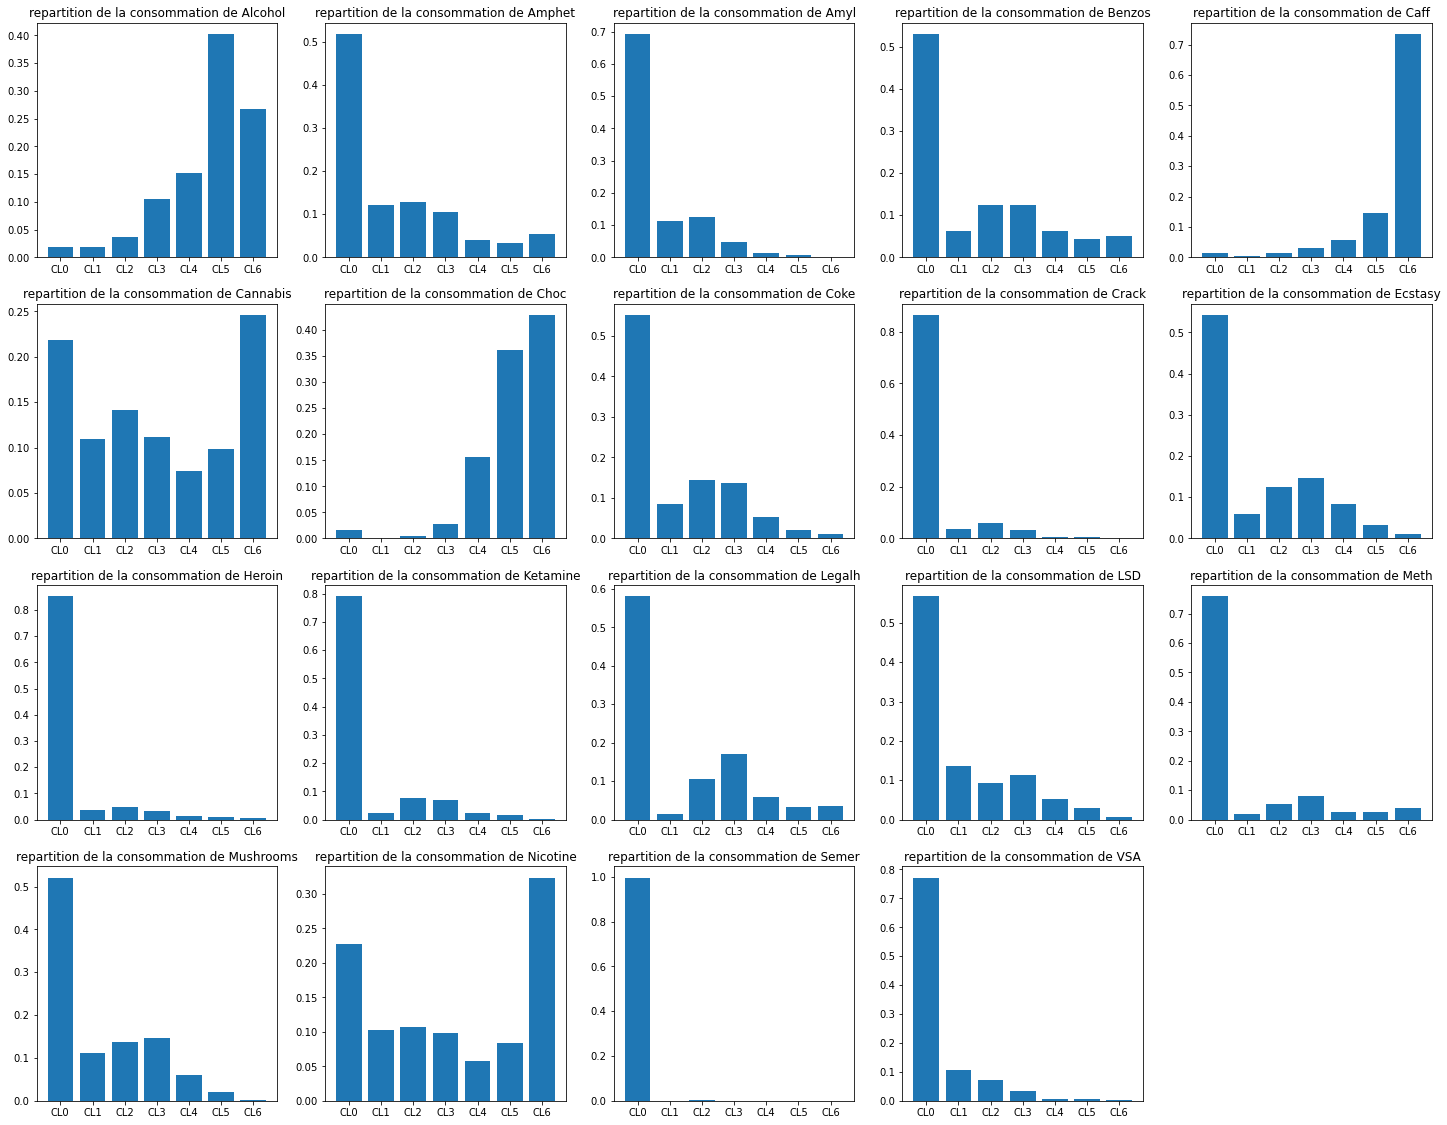

In [18]:
repartitionCL=countCL(dfdrugquantified.columns[12:],dfdrugquantified)


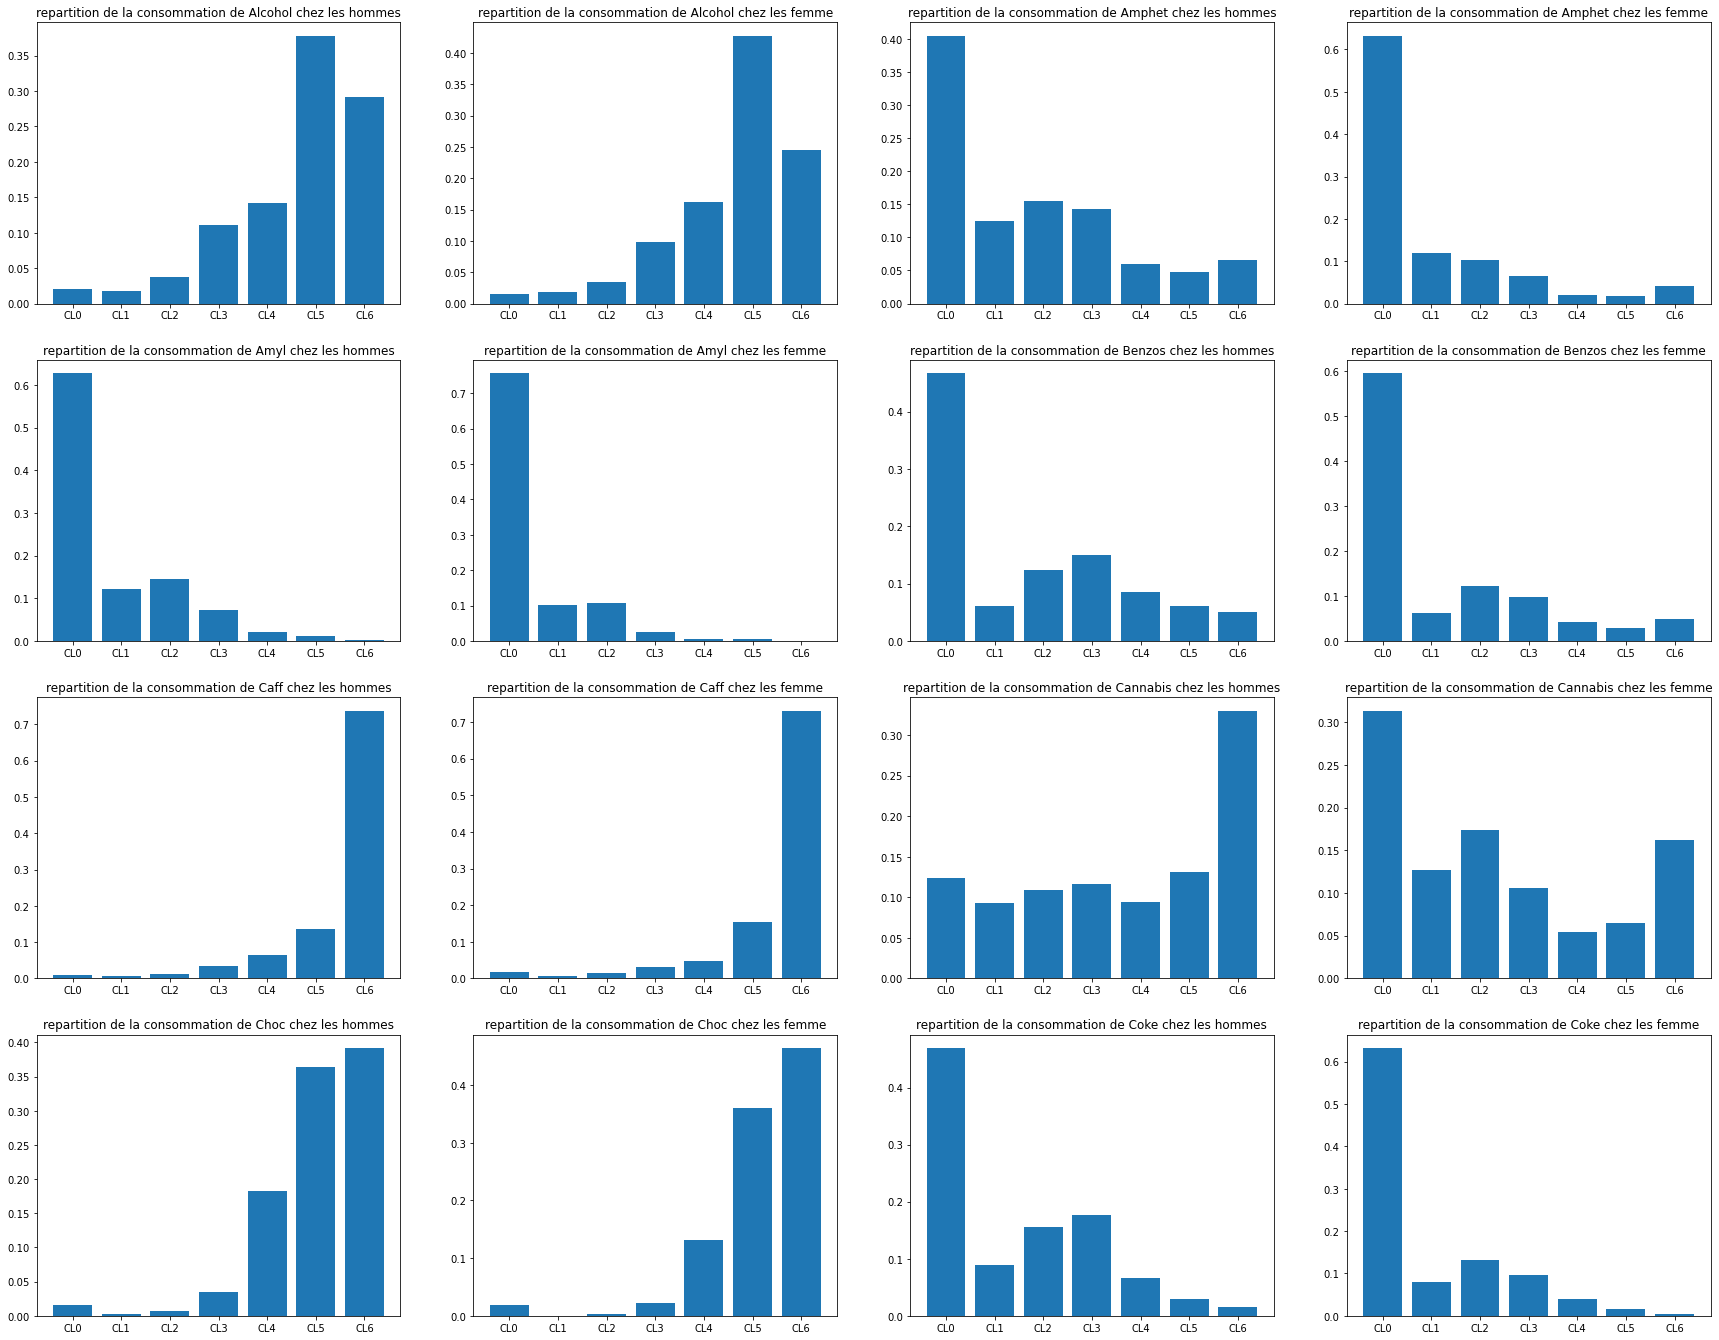

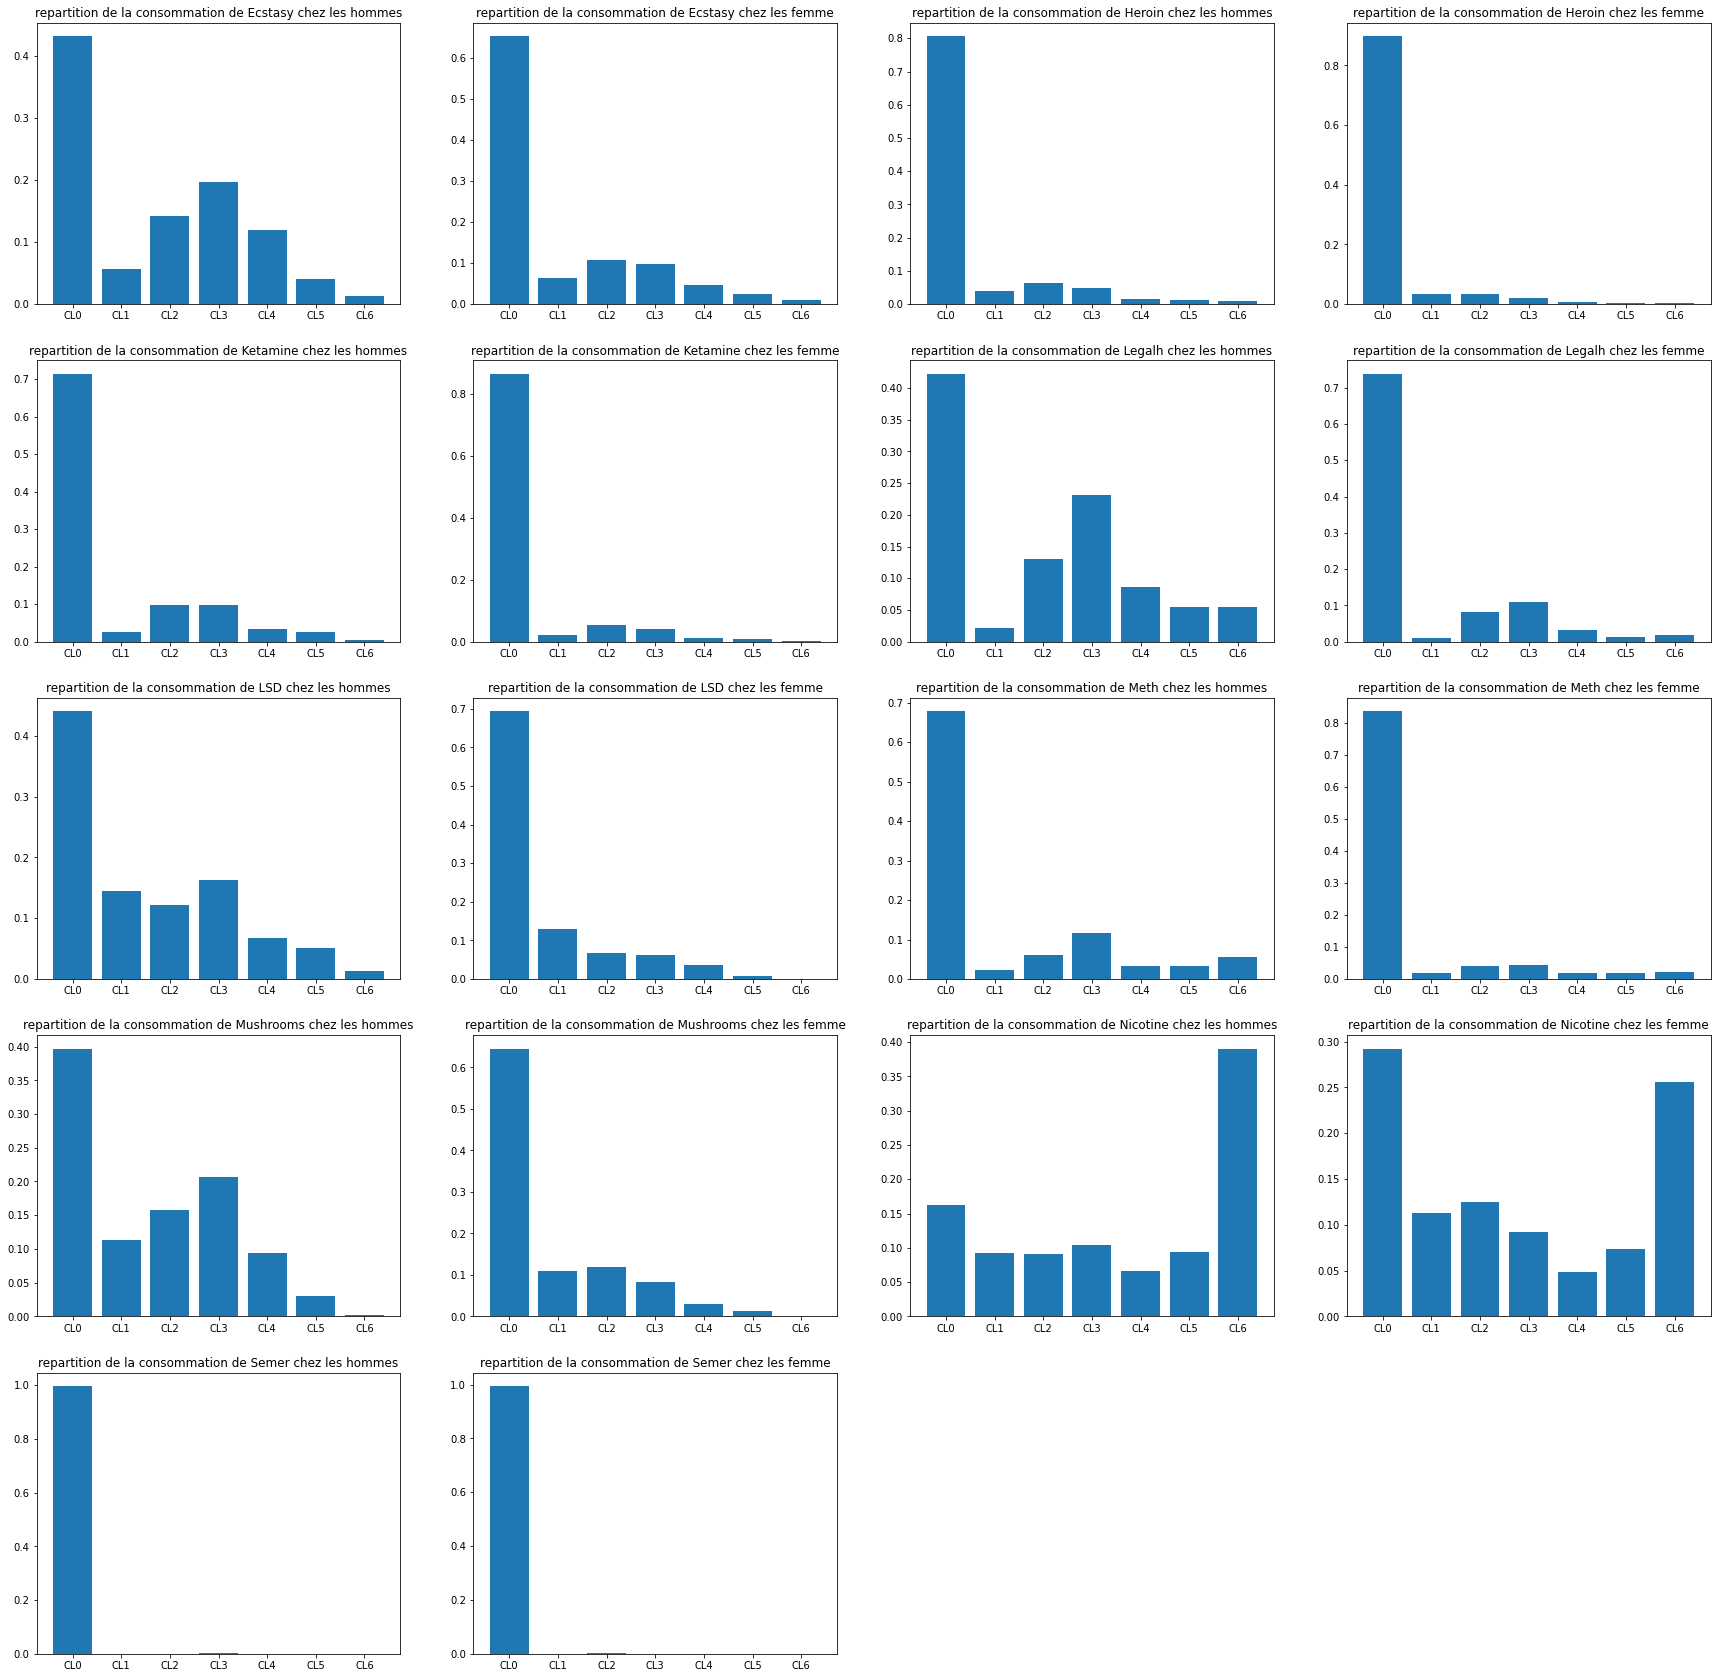

In [19]:
countCLSexe(dfdrugquantified.columns[12:20],dfdrugquantified,dfdrug)
countCLSexe(dfdrugquantified.columns[21:30],dfdrugquantified,dfdrug)


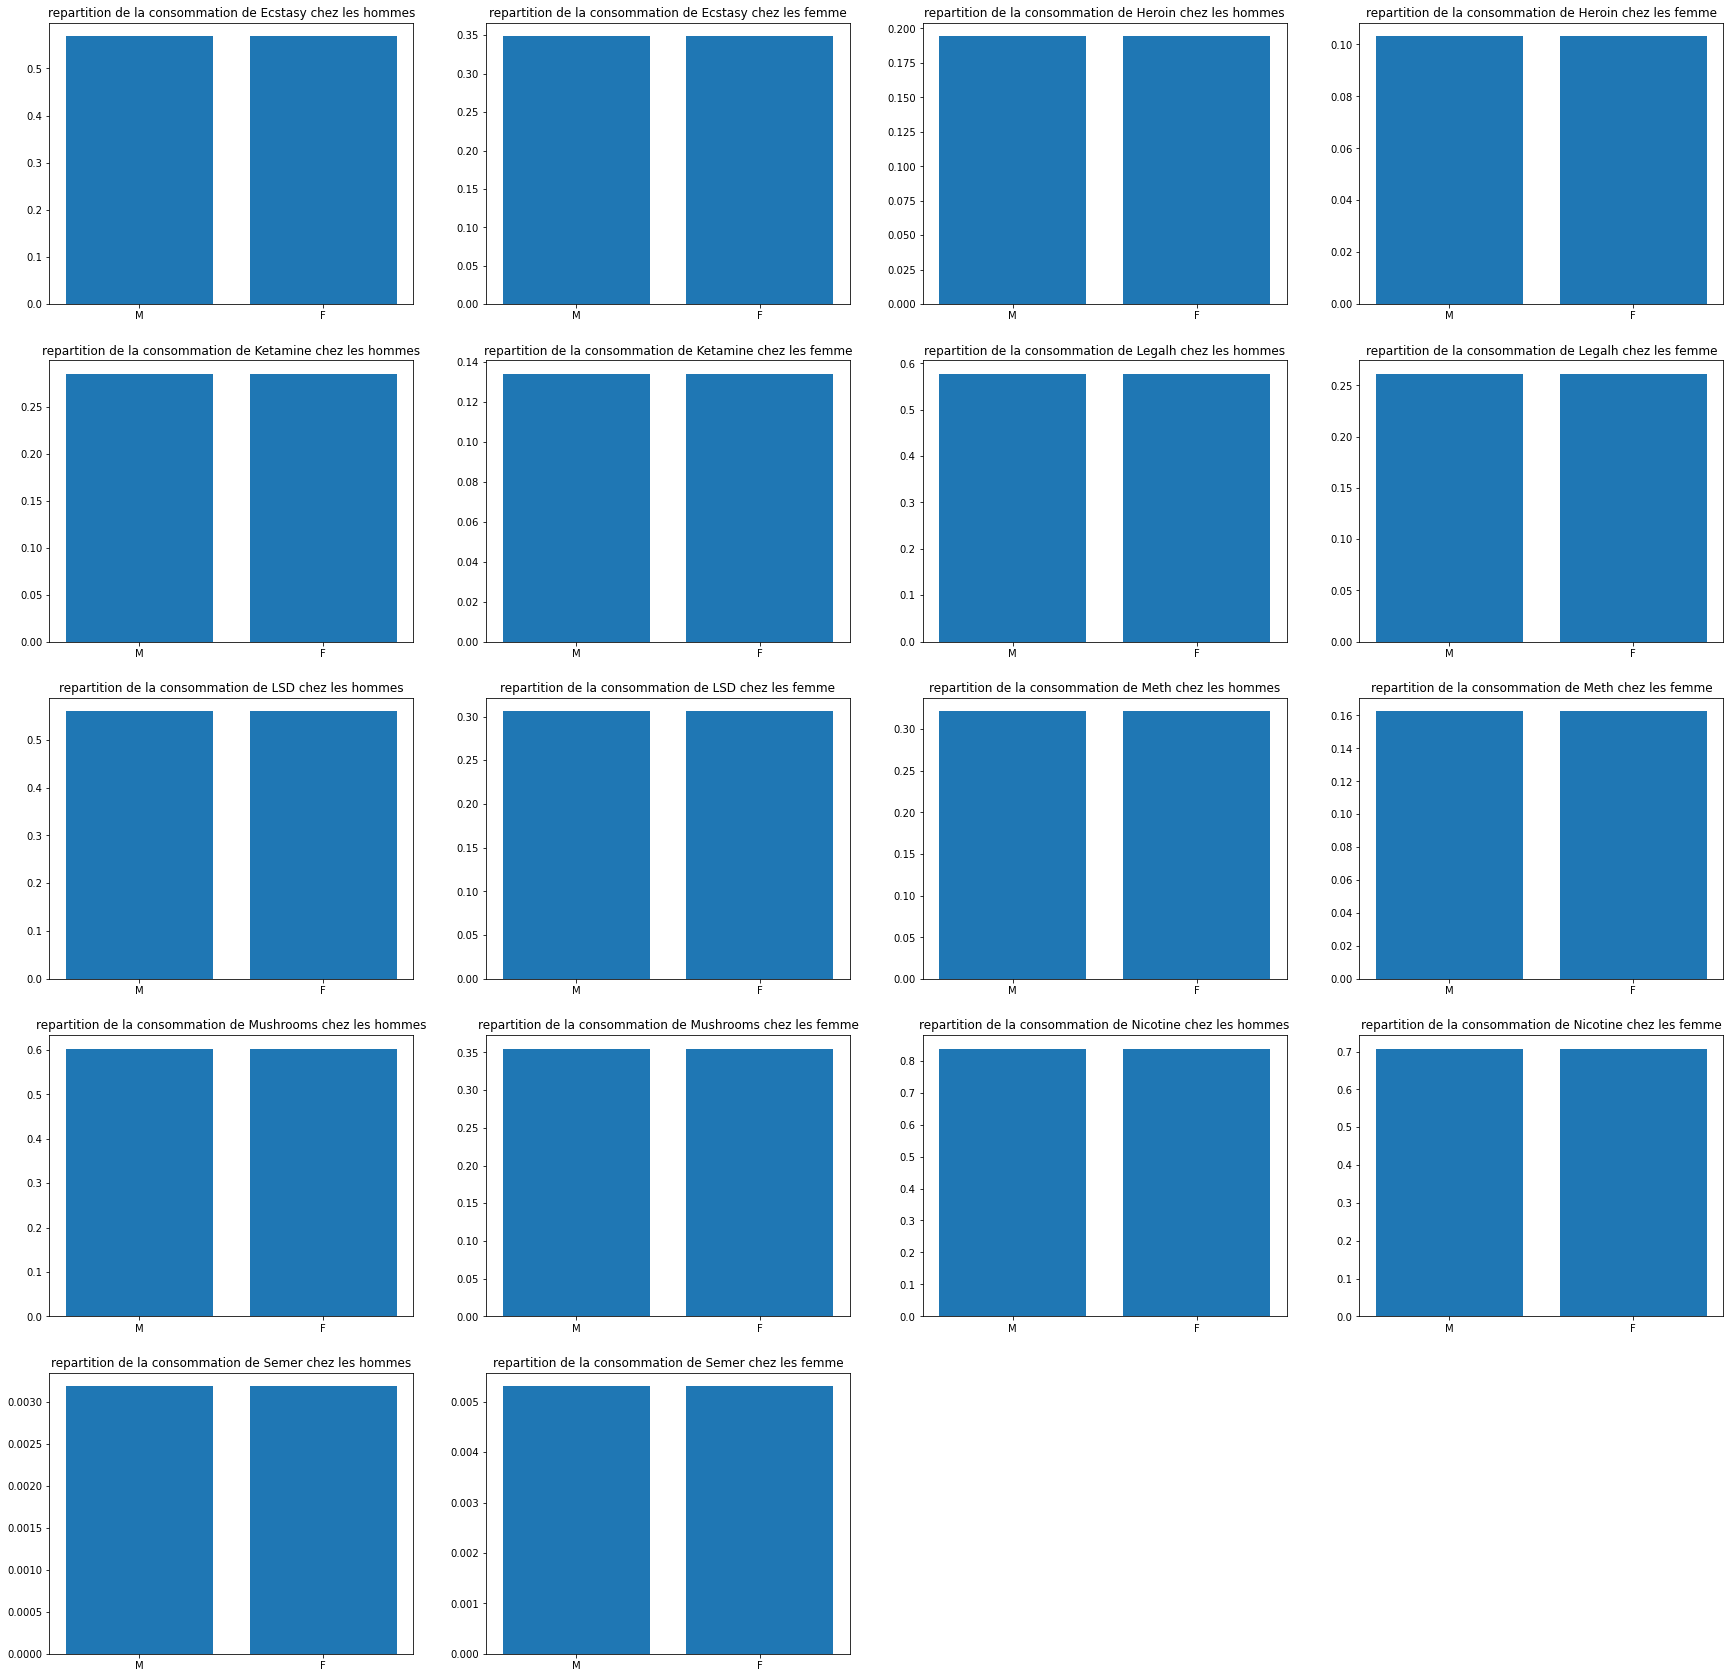

In [22]:
countCLSexeV2(dfdrugquantified.columns[21:30],dfdrugquantified,dfdrug)


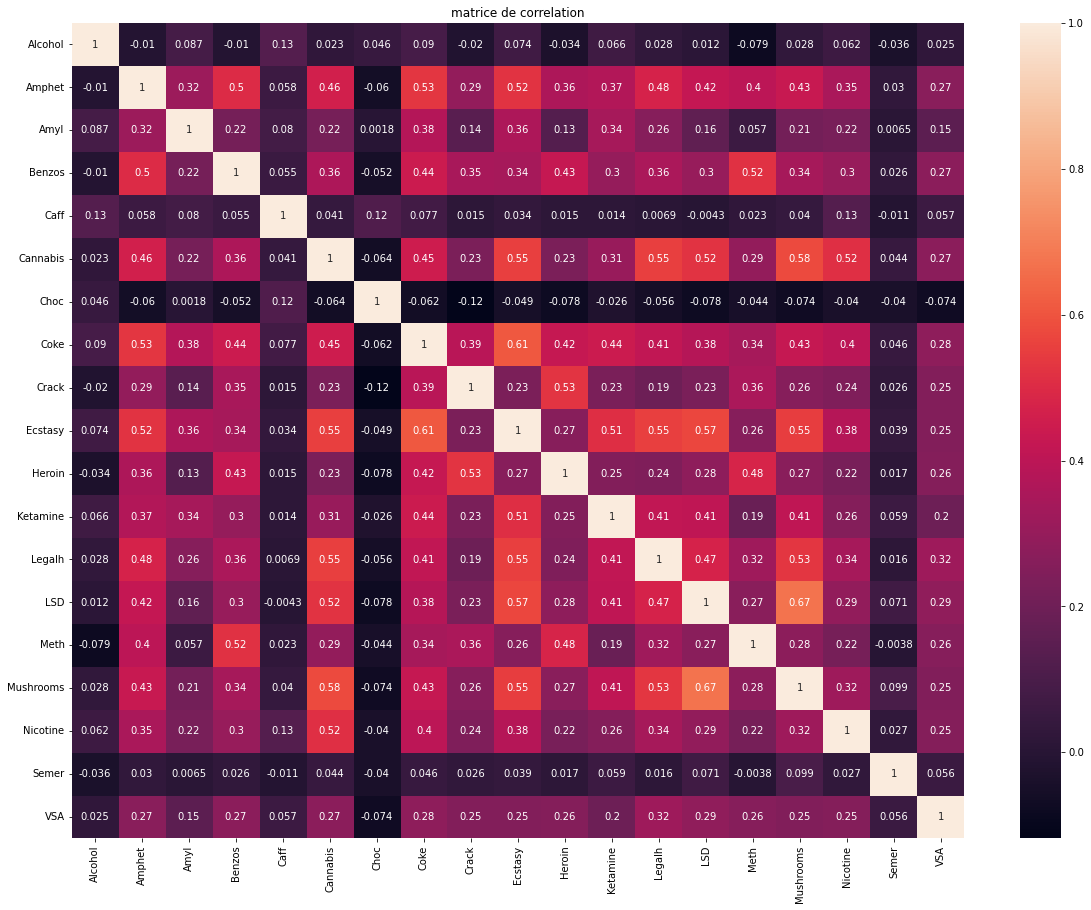

In [398]:
plt.figure(figsize=(20,15))
sns.heatmap(dfdrugquantified.corr(),annot=True)
plt.title("matrice de correlation")
plt.show()